## Deep Learning Course (980)
## Assignment Four 

__Assignment Goals__:

- Implementing Fully Connected AutoEncoders
- Implementing Convolutional AutoEncoders
- Understand Variational Autoncoder intuition


In this assignment, you will be asked to design a Fully Connected and a CNN AutoEncoder. With a simple change in your Fully Connected AutoEncoder, you will become more familiar with Variational AutoEncoder. 

__DataSet:__ In this Assignment, you will use the MNIST handwritten digit database. You can use  (x_train, _), (x_test, _)  = tensorflow.keras.datasets.mnist.load_data() to load the dataset.

1. (30 points) Implement a Fully Connected AutoEncoder in TensorFlow (cf. Chapter 7). Your AutoEncoder should have a bottleneck with two neurons and Mean Squared Error (MSE) as the objective function. In an AutoEncoder, the layer with the least number of neurons is referred to as a bottleneck. Train your model on MNIST. Plot the train and test loss. Randomly select 10 images from the test set, encode them and visualize the decoded images.
     
2. (35 points) Implement a convolutional AutoEncoder (CAE) that uses only the following types of layers: convolution, pooling, upsampling and transpose. You are limited to use MSE. The encoder and decoder should include one or more layers, with the size and number of filters chosen by you. Start with a bottleneck of size 2, train your model on MNIST and plot the train and test loss. Randomly select 10 images from the test set, encode them and visualize the decoded images. Are the reconstructed images readable for humans? If not, try to find a CAE architecture, including a larger bottleneck, that is powerful enough to generate readable images. The bottleneck should be as small as possible for readability, this is part of the grading criteria.

3. (35 points) This question is about using an AutoEncoder to generate similar but not identical hand digits. We use a naive approach: Try to see if a trained decoder can map randomly generated inputs (random numbers) to a recognizable hand-written digit. 
    1. Start with your Fully Connected and trained AutoEncoder from part 1. Try to generate new images by inputting some random numbers  to the decoder (i.e. the bottleneck layer) and report your results. Hint: This is not easy. You probably want to input at least 10 random numbers. 
    2. Now restrict the AutoEncoder hidden bottleneck layer(s) to have a standard multi-variate normal distribution with mean zeroes and the identity matrix as variance (i.e. no correlations). Retrain the Fully Connected AutoEncoder with the normalized bottleneck. Now randomly generate inputs to the bottleneck layer that are drawn from the multi-variate standard normal distribution, and use the random inputs to generate new images. Report your result.
    3. Are the output images different between 1) and 2)? If so, why do you think this difference occurs?

4. (20 points) Optional: change the AutoEncoder which you developed in the last part of section 3 so that it becomes a Variational AutoEncoder (Introduced by Kingma 2014; see Chapter 7.1). Does the VAE produce a different quality of output image?



__Submission Notes__:

Please use Jupyter Notebook. The notebook should include the final code, results, and answers. You should submit your Notebook in .pdf and .ipynb format. (penalty 10 points).
Your AutoEncoders should have only one bottleneck.
 



__Instructions__:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your writing or coding. You must not let other students copy your work. Spelling and grammar count.



# Question 1

Bottleneck is 2 

20 images are selected after training and reconstruction is performed

In [1]:
from keras.datasets import mnist

import os, re, math, json, shutil, pprint
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import IPython.display as display
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
# tf.enable_eager_execution()

BATCH_SIZE = 64
EPOCHS = 5

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
training_dataset = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
validation_dataset = x_test.reshape((len(x_test), np.prod(x_train.shape[1:])))


Using TensorFlow backend.


In [2]:
model = tf.keras.Sequential(
  [
      
      tf.keras.layers.Dense(64),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dense(32),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dense(2),
      tf.keras.layers.Activation('relu'),
      
      
      tf.keras.layers.Dense(32),
      tf.keras.layers.Activation('relu'),
   

      tf.keras.layers.Dense(64),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dense(784)
  ])

In [3]:

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='MSE')

In [4]:
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

history = model.fit(x = training_dataset, y = training_dataset, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=(validation_dataset, validation_dataset) , validation_steps=1)


W0405 04:49:32.810892 139739884926784 training_utils.py:1210] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.
W0405 04:49:32.821275 139739884926784 deprecation.py:506] From /home/vishal/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Steps per epoch:  937
Train on 937 samples, validate on 10000 samples
Epoch 1/5
937/937 [==============================] - 373s 398ms/step - loss: 0.0552 - val_loss: 0.0444
Epoch 2/5
937/937 [==============================] - 370s 395ms/step - loss: 0.0423 - val_loss: 0.0421
Epoch 3/5
937/937 [==============================] - 370s 395ms/step - loss: 0.0406 - val_loss: 0.0415
Epoch 4/5
937/937 [==============================] - 370s 395ms/step - loss: 0.0399 - val_loss: 0.0413
Epoch 5/5
937/937 [==============================] - 371s 396ms/step - loss: 0.0395 - val_loss: 0.0411


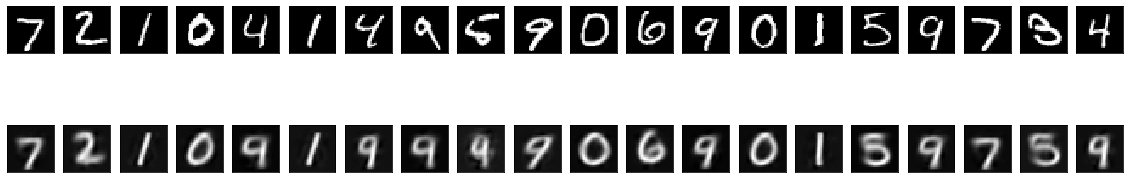

In [5]:
pre = model.predict(validation_dataset[:20])
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(validation_dataset[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(pre[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

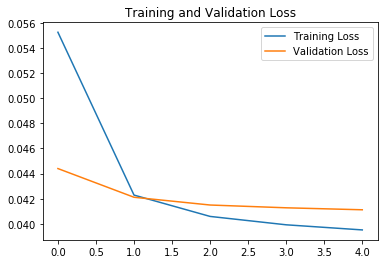

In [6]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Question 2 Convolution Autoencoder

Below shown are the results from two different models having different bottleneck

## 1st model has a bottleneck of 4 (2*2*1)

## 2nd model has a bottlenect of 32 (4*4*2)

### Both the models generate readable images.

In [11]:
model2 = tf.keras.Sequential(
  [
      
      tf.keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same',strides = 2, input_shape=(28,28,1)),

      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      
      tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),

      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),

      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      
      tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same'),

      
      tf.keras.layers.UpSampling2D((2, 2)),      
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),

      tf.keras.layers.UpSampling2D((2, 2)),      
      tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
      
      tf.keras.layers.UpSampling2D((2, 2)),      
      tf.keras.layers.Conv2D(4, (3, 3), activation='relu'),
      
      tf.keras.layers.UpSampling2D((2, 2)),      
      tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same')
  ])

In [12]:
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='MSE')


In [13]:
# print model layers
model2.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 14, 14, 4)         40        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           296       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 16)          1168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 2, 1)          

In [14]:
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

training_dataset = np.reshape(training_dataset, (len(training_dataset), 28, 28, 1))
validation_dataset = np.reshape(validation_dataset, (len(validation_dataset), 28, 28, 1))
EPOCHS = 5
history = model2.fit(x = training_dataset, y = training_dataset, batch_size=16, epochs=EPOCHS,
                    validation_data=(validation_dataset, validation_dataset) , validation_steps=1)


Steps per epoch:  937
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.0566 - val_loss: 0.0548
Epoch 2/5
60000/60000 [==============================] - 16s 274us/sample - loss: 0.0537 - val_loss: 0.0531
Epoch 3/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.0528 - val_loss: 0.0523
Epoch 4/5
60000/60000 [==============================] - 20s 336us/sample - loss: 0.0521 - val_loss: 0.0509
Epoch 5/5
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0516 - val_loss: 0.0505


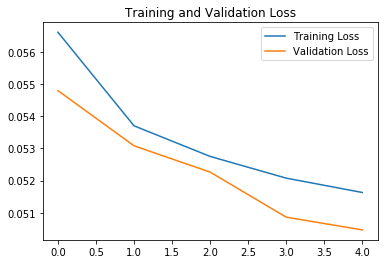

In [15]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

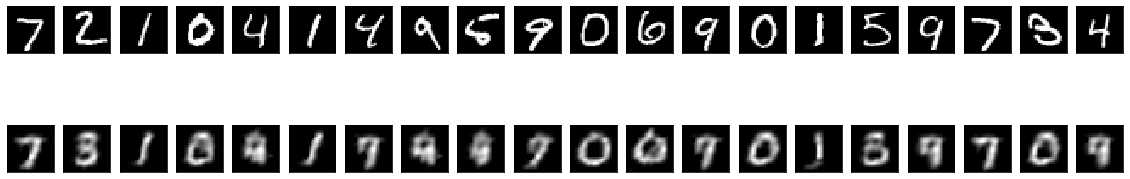

In [16]:
pre = model2.predict(validation_dataset)
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(validation_dataset[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(pre[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

## Question 2 Second Model with bottleneck 32

In [3]:
encoderQ2 = tf.keras.Sequential(
  [

      tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)),

      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),

      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      
      tf.keras.layers.Conv2D(2, (3, 3), activation='relu', padding='same'),

      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      
#       tf.keras.layers.Flatten()
  ])
    

In [4]:
encoderQ2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 2)           290       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 2)           0         
Total params: 1,538
Trainable params: 1,538
Non-trainable params: 0
____________________________________________________

In [5]:
decoderQ2 = tf.keras.Sequential(
  [
      
#       tf.keras.layers.Reshape((4,4,2), input_shape = [32]),
      
      tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape = (4,4,2)),


      
      tf.keras.layers.UpSampling2D((2, 2)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),


      
      tf.keras.layers.UpSampling2D((2, 2)),      
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),

      
      tf.keras.layers.UpSampling2D((2, 2)),      
      tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same')
  
  ])

In [6]:
decoderQ2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 4, 4, 8)           152       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          1168      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 1)        

In [7]:
encode_decode = tf.keras.Sequential(
    [
        encoderQ2,
        
        decoderQ2
    ])

In [8]:
encode_decode.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 4, 4, 2)           1538      
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28, 1)         3785      
Total params: 5,323
Trainable params: 5,323
Non-trainable params: 0
_________________________________________________________________


In [9]:
encode_decode.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='MSE')

steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

training_dataset = np.reshape(training_dataset, (len(training_dataset), 28, 28, 1))
validation_dataset = np.reshape(validation_dataset, (len(validation_dataset), 28, 28, 1))
EPOCHS = 10
history = encode_decode.fit(x = training_dataset, y = training_dataset, batch_size=16, epochs=EPOCHS,
                    validation_data=(validation_dataset, validation_dataset) , validation_steps=1)


Steps per epoch:  937
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 612us/sample - loss: 0.0247 - val_loss: 0.0205
Epoch 2/10
60000/60000 [==============================] - 37s 612us/sample - loss: 0.0197 - val_loss: 0.0187
Epoch 3/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0190 - val_loss: 0.0186
Epoch 4/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.0187 - val_loss: 0.0176
Epoch 5/10
60000/60000 [==============================] - 39s 650us/sample - loss: 0.0185 - val_loss: 0.0192
Epoch 6/10
60000/60000 [==============================] - 39s 647us/sample - loss: 0.0183 - val_loss: 0.0177
Epoch 7/10
60000/60000 [==============================] - 38s 631us/sample - loss: 0.0182 - val_loss: 0.0179
Epoch 8/10
60000/60000 [==============================] - 37s 613us/sample - loss: 0.0182 - val_loss: 0.0175
Epoch 9/10
60000/60000 [==============================] 

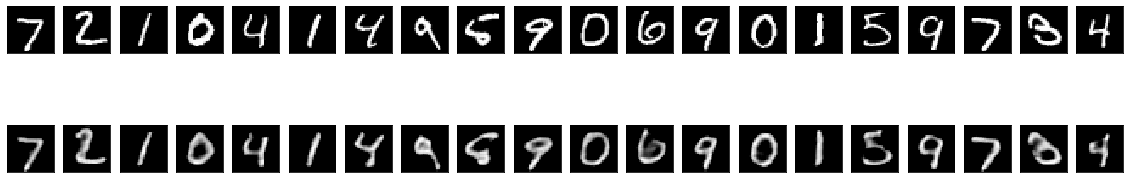

In [10]:
pre = encode_decode.predict(validation_dataset)
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(validation_dataset[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(pre[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

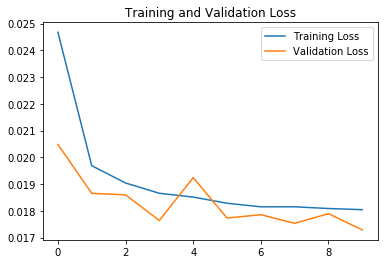

In [12]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Question 3

## Part A generating digits from random inputs from a fully-connected autoencoder

In [3]:
linear_encode_Q3_a = tf.keras.Sequential(
  [
      
      tf.keras.layers.Dense(64, input_shape=[784]),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dense(32),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dense(2),
      tf.keras.layers.Activation('relu'),
      
  ])


linear_decode_Q3_a = tf.keras.Sequential(
    [
    
      tf.keras.layers.Dense(32, input_shape = [2]),
      tf.keras.layers.Activation('relu'),
   

      tf.keras.layers.Dense(64),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dense(784)
    
    ])

linear_encode_Q3_a.summary()

linear_decode_Q3_a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_6 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_7 (Activation)    (None, 2)                 0         
Total params: 52,386
Trainable params: 52,386
Non-trainable params: 0
__________________________________________________

In [4]:
linear_encode_decode_Q3_a = tf.keras.Sequential(
    [
        linear_encode_Q3_a,
        linear_decode_Q3_a
    ])


linear_encode_decode_Q3_a.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 52386     
_________________________________________________________________
sequential_3 (Sequential)    (None, 784)               53168     
Total params: 105,554
Trainable params: 105,554
Non-trainable params: 0
_________________________________________________________________


In [5]:

linear_encode_decode_Q3_a.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='MSE')

In [6]:
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

history = linear_encode_decode_Q3_a.fit(x = training_dataset, y = training_dataset, steps_per_epoch=steps_per_epoch, epochs=5,
                    validation_data=(validation_dataset, validation_dataset) , validation_steps=1)


W0406 11:47:52.602271 140342782269248 training_utils.py:1210] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Steps per epoch:  937
Train on 937 samples, validate on 10000 samples
Epoch 1/5
937/937 [==============================] - 371s 396ms/step - loss: 0.0526 - val_loss: 0.0468
Epoch 2/5
937/937 [==============================] - 363s 388ms/step - loss: 0.0444 - val_loss: 0.0437
Epoch 3/5
937/937 [==============================] - 365s 389ms/step - loss: 0.0422 - val_loss: 0.0425
Epoch 4/5
937/937 [==============================] - 365s 389ms/step - loss: 0.0411 - val_loss: 0.0420
Epoch 5/5
937/937 [==============================] - 366s 391ms/step - loss: 0.0405 - val_loss: 0.0418


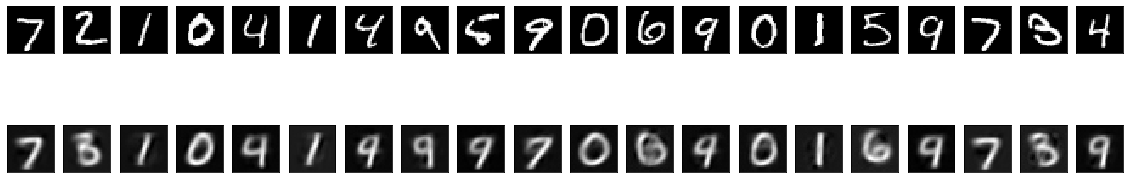

In [9]:
pre = linear_encode_decode_Q3_a.predict(validation_dataset)
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    
    
#     print(linear_encode_decode.get_layer('sequential_1').get_weight())
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(validation_dataset[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pre[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


40.580257
[[29.47952561 12.90482268]
 [ 4.73583001 23.11078052]
 [19.45342712 20.94565334]
 [28.78695111 39.11972652]
 [38.63494615 31.97700072]
 [35.41673437 26.85603915]
 [ 9.14135472  9.19347947]
 [37.47470172 33.06936373]
 [20.88068807 12.45097406]
 [22.68004706 22.72494581]
 [ 0.74019407 33.60931198]
 [ 0.60706665  0.22019938]
 [32.36176738 14.47742399]
 [ 9.30432884  7.00959072]
 [ 9.05591749  8.66813462]
 [16.18259442 37.89848276]
 [18.69487499  3.8912324 ]
 [16.92490159 31.01854084]
 [35.77907508 28.73728039]
 [ 9.8569996   3.76383415]]


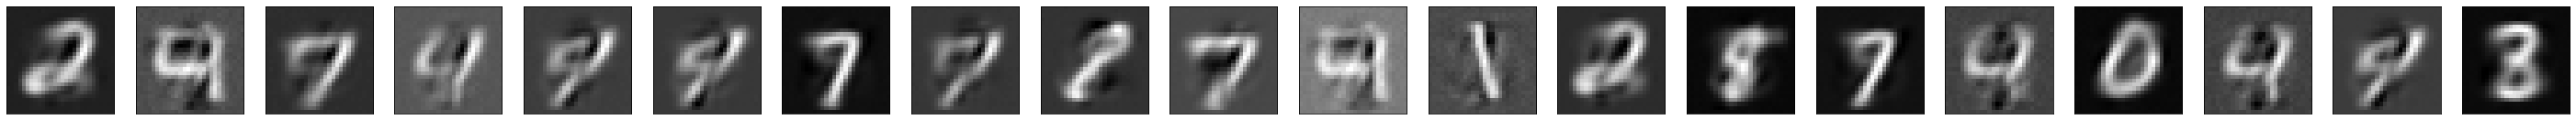

In [59]:
from tensorflow.keras import models

activation_model = tf.keras.models.Model(inputs=linear_encode_decode_Q3_a.get_layer('sequential_2').input, outputs=linear_encode_decode_Q3_a.get_layer('sequential_2').output)
# activation_model.summary()

activations = activation_model.predict(validation_dataset) # Returns a list of five Numpy arrays: one array per layer activation

print(activations.max())


tf.random.set_random_seed(40)


# print(activations[:10])
# np.random.rand(3,2)
# codings = 40 * np.random.multivariate_normal(mean = [0], cov = np.identity(1), size = (20, 2))
codings = 40 * np.random.random_sample((20, 2))
codings = codings.reshape(20,2)
print(codings)

# print(codings.shape())
images = linear_encode_decode_Q3_a.get_layer('sequential_3').predict(codings)

n = 20
plt.figure(figsize=(50, 50))
for i in range(n):
    

    ax = plt.subplot(5, n, i + 1)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# plt.imshow(figure, cmap='Greys_r')
plt.show()

## Part B Restricting the bottleneck with BatchNormalization

In [25]:

linear_encode_Q3_b = tf.keras.Sequential(
  [
      
      tf.keras.layers.Dense(64, input_shape=[784]),
      tf.keras.layers.Activation('relu'),
#       tf.keras.layers.BatchNormalization(),
      
      tf.keras.layers.Dense(32),
      tf.keras.layers.Activation('relu'),
#       tf.keras.layers.BatchNormalization(),
      
      tf.keras.layers.Dense(2),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.BatchNormalization(),
      
  ])


linear_decode_Q3_b = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32, input_shape = [2]),
        
        tf.keras.layers.Activation('relu'),
        
#         tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(64),
        tf.keras.layers.Activation('relu'),
#         tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(784)
    
    ])

linear_encode_Q3_b.summary()

linear_decode_Q3_b.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_11 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
_________________________________________________________________
activation_12 (Activation)   (None, 2)                 0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                

In [26]:
linear_encode_decode_Q3_b = tf.keras.Sequential(
    [
        linear_encode_Q3_b,
        linear_decode_Q3_b
    ])


linear_encode_decode_Q3_b.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 2)                 52394     
_________________________________________________________________
sequential_6 (Sequential)    (None, 784)               53168     
Total params: 105,562
Trainable params: 105,558
Non-trainable params: 4
_________________________________________________________________


In [27]:

linear_encode_decode_Q3_b.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='MSE')


In [28]:
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

history = linear_encode_decode_Q3_b.fit(x = training_dataset, y = training_dataset, steps_per_epoch=steps_per_epoch, epochs=5,
                    validation_data=(validation_dataset, validation_dataset) , validation_steps=1)


W0406 12:24:24.129403 140342782269248 training_utils.py:1210] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Steps per epoch:  937
Train on 937 samples, validate on 10000 samples
Epoch 1/5
937/937 [==============================] - 365s 390ms/step - loss: 0.0506 - val_loss: 0.0444
Epoch 2/5
937/937 [==============================] - 366s 390ms/step - loss: 0.0418 - val_loss: 0.0419
Epoch 3/5
937/937 [==============================] - 366s 391ms/step - loss: 0.0397 - val_loss: 0.0413
Epoch 4/5
937/937 [==============================] - 366s 391ms/step - loss: 0.0390 - val_loss: 0.0409
Epoch 5/5
937/937 [==============================] - 366s 391ms/step - loss: 0.0386 - val_loss: 0.0409


4.7244024
[[ 0.10224056  0.16561425]
 [ 0.44676842 -0.52031492]
 [-0.0783324   1.0572029 ]
 [ 0.59216819 -0.91458555]
 [ 1.02689347  1.37967937]
 [ 0.61806759  0.65713716]
 [ 0.20681898 -0.15255385]
 [-0.81104671  0.58297344]
 [-1.47438905  0.32206267]
 [-1.07448749 -0.65517567]
 [-0.15961943 -1.67941632]
 [-1.79239183  0.93161165]
 [ 1.13834268  0.92669472]
 [ 0.9550033   1.42115884]
 [-0.87414339 -0.40526265]
 [ 0.46619671 -1.00750088]
 [-1.39853041  0.87404959]
 [-0.04433503  1.2177481 ]
 [ 0.15496337  0.33104396]
 [ 0.50765941  0.81655234]]


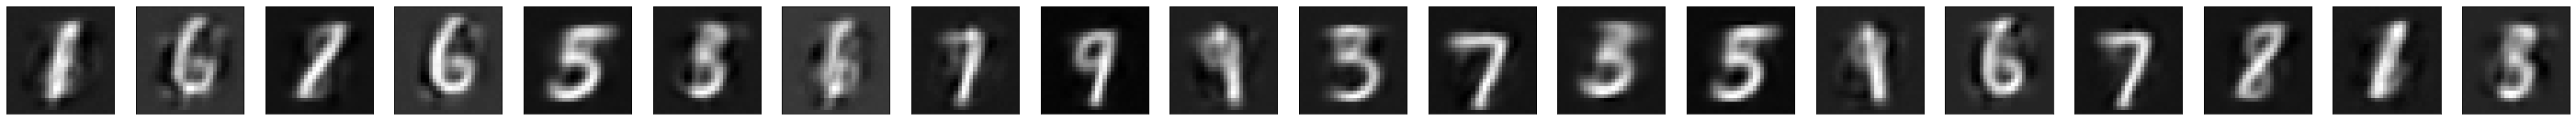

In [34]:
from tensorflow.keras import models


activation_model = tf.keras.models.Model(inputs=linear_encode_decode_Q3_b.get_layer('sequential_5').input, outputs=linear_encode_decode_Q3_b.get_layer('sequential_5').output)
# activation_model.summary()

activations = activation_model.predict(validation_dataset) # Returns a list of five Numpy arrays: one array per layer activation

# print(activations.max())


# tf.random.set_random_seed(10)


# print(activations[:10])
# np.random.rand(3,2)
# codings = 11 * np.random.random_sample((20, 2)) - 5.5 
codings = np.random.multivariate_normal(mean = [0], cov = np.identity(1), size = (20, 2))

codings = codings.reshape(20,2)

# codings = activations[:20]

print(codings)


# print(codings.shape())
images = linear_encode_decode_Q3_b.get_layer('sequential_6').predict(codings)

n = 20
plt.figure(figsize=(50, 50))
for i in range(n):
    

    ax = plt.subplot(5, n, i + 1)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Part 3

The results from part 2 i.e. with BatchNormalization is better and it can be seen from both the generated images and the loss recorded while training the network.

This is because the output from the encoder is Normalize and scaled to have mean 0 and variance 1 which makes sure that the error due to any outlier does not affect the network a lot. Thus the network learns better to generate new images similar to the training images but not exactly the training images

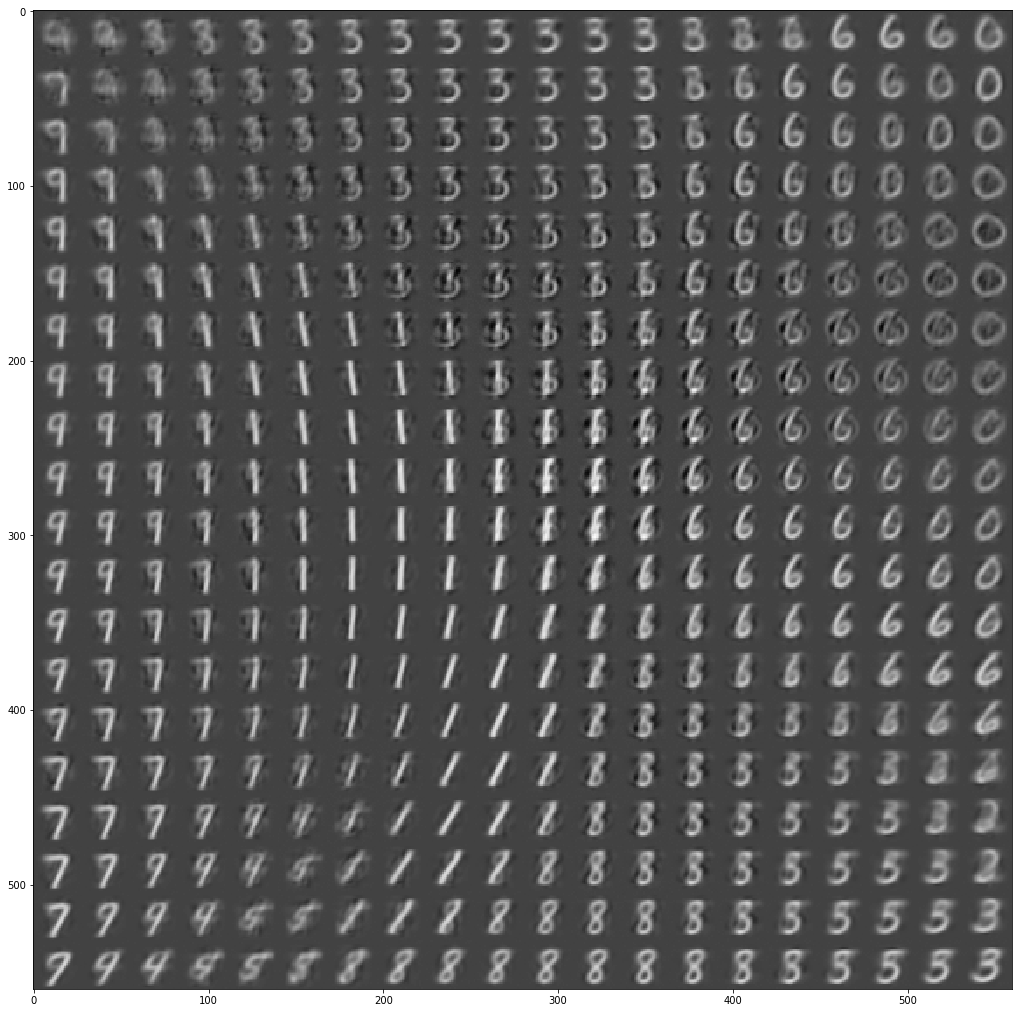

In [49]:
from scipy.stats import norm

# display a 2D manifold of the digits
n = 20  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = linear_encode_decode_Q3_b.get_layer('sequential_6').predict(z_sample)

        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(18, 18))
plt.imshow(figure, cmap='Greys_r')
plt.show()


# Part 4 Variational AutoEncoder

## vae loss is defined 

### Results are better than both convolution AE and Normal AE

In [39]:
batch_size = 100
original_dim = 784
epochs = 50

# Encoder Network

x = tf.keras.layers.Input(shape=(original_dim,))   
x1 = tf.keras.layers.Dense(64, activation='relu')(x) 
h = tf.keras.layers.Dense(32, activation='relu')(x1)      
z_mean = tf.keras.layers.Dense(2)(h)                              
z_log_var = tf.keras.layers.Dense(2)(h)   
epsilon = tf.random_normal(shape=(batch_size,2), mean = 0.)
z = z_mean + tf.multiply(tf.exp(z_log_var/2),epsilon)
encoder = tf.keras.Model(x, [z_mean, z_log_var, z])

In [40]:
encoder.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 64)           50240       input_3[0][0]                    
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 32)           2080        dense_25[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 2)            66          dense_26[0][0]                   
___________________________________________________________________________________________

In [41]:
# Decoder Network

x_d = tf.keras.layers.Input(shape=(2,))   
x_d1 = tf.keras.layers.Dense(32, activation='relu')(x_d)
h_d = tf.keras.layers.Dense(64, activation='relu')(x_d1)
x_decoded = tf.keras.layers.Dense(original_dim, activation='sigmoid')(h_d)                                    
decoder = tf.keras.Model(x_d, x_decoded)

In [42]:
decoder.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_30 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_31 (Dense)             (None, 784)               50960     
Total params: 53,168
Trainable params: 53,168
Non-trainable params: 0
_________________________________________________________________


In [52]:
from tensorflow.keras.models import Model

output_combined = decoder(encoder(x)[2])

vae = Model(x, output_combined)

vae.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
model_19 (Model)             [(None, 2), (None, 2), (1 52452     
_________________________________________________________________
model_20 (Model)             multiple                  53168     
Total params: 105,620
Trainable params: 105,620
Non-trainable params: 0
_________________________________________________________________


In [55]:
def vae_loss(x, x_decoded_mean, z_log_var=z_log_var, z_mean=z_mean, original_dim=original_dim):
  
    Recon_loss = original_dim * tf.keras.metrics.binary_crossentropy(x, x_decoded_mean)


    KL_loss = - 0.5 * tf.math.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    
    vae_loss = tf.math.reduce_mean(Recon_loss + KL_loss)
    
    return vae_loss/100

vae.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=vae_loss)

vae.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
model_19 (Model)             [(None, 2), (None, 2), (1 52452     
_________________________________________________________________
model_20 (Model)             multiple                  53168     
Total params: 105,620
Trainable params: 105,620
Non-trainable params: 0
_________________________________________________________________


In [45]:
vae.fit(training_dataset, training_dataset,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/sample - loss: 2.1084
Epoch 2/50
60000/60000 [==============================] - 2s 25us/sample - loss: 1.7683
Epoch 3/50
60000/60000 [==============================] - 2s 25us/sample - loss: 1.7100
Epoch 4/50
60000/60000 [==============================] - 2s 25us/sample - loss: 1.6710
Epoch 5/50
60000/60000 [==============================] - 2s 26us/sample - loss: 1.6436
Epoch 6/50
60000/60000 [==============================] - 2s 26us/sample - loss: 1.6213
Epoch 7/50
60000/60000 [==============================] - 2s 25us/sample - loss: 1.6033
Epoch 8/50
60000/60000 [==============================] - 2s 26us/sample - loss: 1.5862
Epoch 9/50
60000/60000 [==============================] - 2s 27us/sample - loss: 1.5726
Epoch 10/50
60000/60000 [==============================] - 2s 26us/sample - loss: 1.5610
Epoch 11/50
60000/60000 [==============================] - 2s 27us/sample - loss: 1.5511
Epoch 1

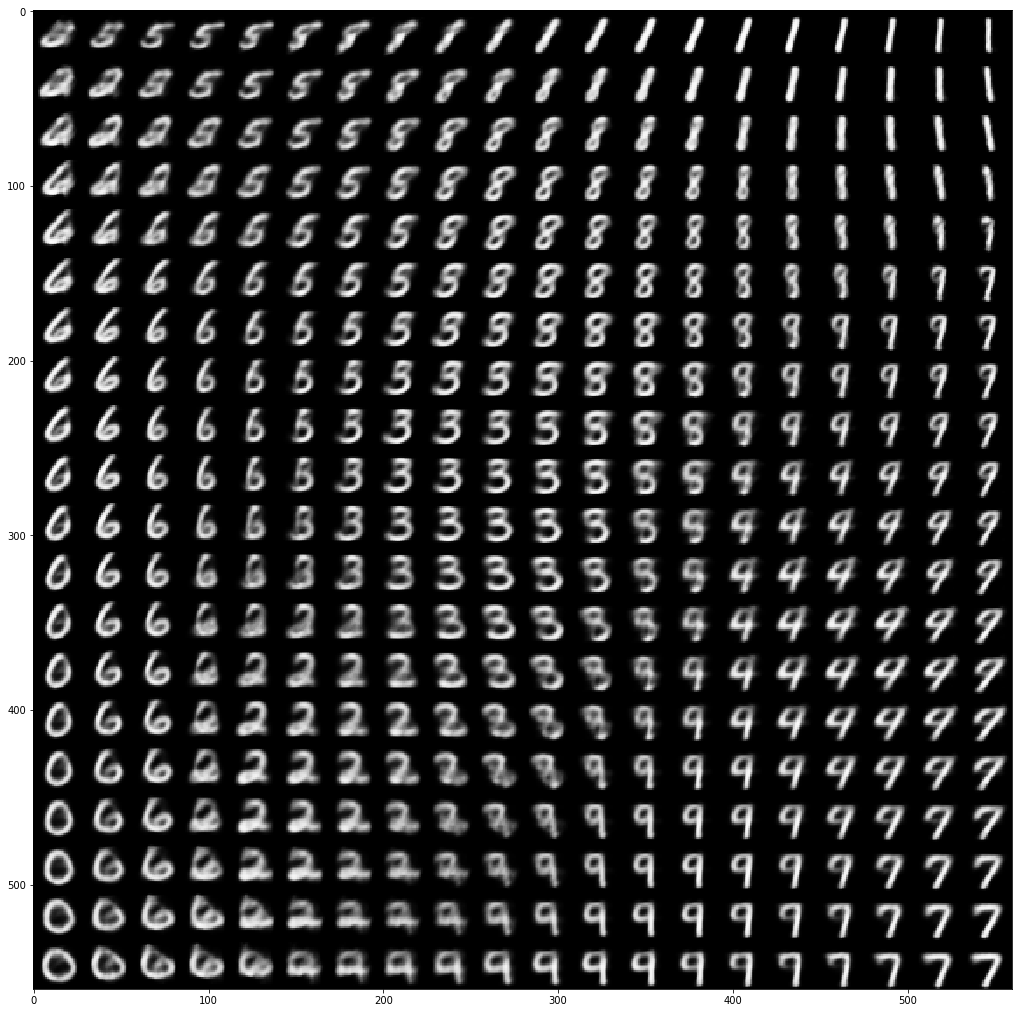

In [48]:
from scipy.stats import norm

n = 20  
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(18, 18))
plt.imshow(figure, cmap='Greys_r')
plt.show()

